In [1]:
%matplotlib inline

import os
import requests
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import sys

from pandas.tools.plotting import scatter_matrix

from sklearn import cross_validation as cv
from sklearn.cross_validation import train_test_split as tts
from sklearn.linear_model import Ridge
from sklearn.linear_model import RandomizedLasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import FeatureUnion
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from sklearn.preprocessing import FunctionTransformer
from scipy import stats
from sklearn.linear_model import ElasticNet

C:\Users\mjsteele\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import Data
data = pd.read_csv('D:\\yelp\\data\\Final_Regression_Data\\Final\\the_final_countdown-1\\the_final_countdown.csv')

In [3]:
data.head()

,_id,restaurant_name,address_full,business_id,review_count,inspection_date,stars,latitude,longitude,violations,...,LasVegas,neighborhood0,neighborhood1,neighborhood2,neighborhood3,neighborhood4,neighborhood5,neighborhood6,PreviousViolations,DiffPreviousTwo
0,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,8/4/2008,4.0,42.35377,-71.137418,8,...,0,0,0,0,0,0,0,0,0,0
1,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,8/18/2008,4.0,42.35377,-71.137418,8,...,0,0,0,0,0,0,0,0,8,0
2,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,7/13/2009,4.0,42.35377,-71.137418,4,...,0,0,0,0,0,0,0,0,8,0
3,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,7/27/2009,4.0,42.35377,-71.137418,4,...,0,0,0,0,0,0,0,0,4,0
4,ObjectId(5830680bf3f071f6de30b1d0),GRASSHOPPER VEGETARIAN,1 N Beacon ST Allston 02134,MiOurH3MHs6CwA6iOWehOQ,424,6/3/2010,4.0,42.35377,-71.137418,12,...,0,0,0,0,0,0,0,0,4,0


In [4]:
data.shape

(34991, 68)

In [5]:
data.describe()

,review_count,stars,latitude,longitude,violations,ChangeInViolations,IsAsian,IsFrench,IsSandwiches,IsFastFood,...,LasVegas,neighborhood0,neighborhood1,neighborhood2,neighborhood3,neighborhood4,neighborhood5,neighborhood6,PreviousViolations,DiffPreviousTwo
count,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,...,34991.000000,34991.0,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000,34991.000000
mean,121.214227,3.601626,39.289480,-85.464582,6.934669,1.555171,0.192650,0.008459,0.113629,0.050699,...,0.290389,0.0,0.581807,0.521363,0.663371,0.551399,0.350804,0.443228,6.326484,-0.045297
std,178.588309,0.700143,3.355512,19.216630,8.340175,5.429591,0.394386,0.091586,0.317365,0.219385,...,0.453948,0.0,0.493269,0.499551,0.472564,0.497358,0.477229,0.496774,8.282943,3.511681
min,3.000000,1.000000,33.000000,-115.000000,0.000000,-42.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-98.000000
25%,21.000000,3.000000,36.000000,-115.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,60.000000,4.000000,42.292474,-71.137565,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,148.000000,4.000000,42.349124,-71.068237,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,0.000000
max,1922.000000,5.000000,42.389913,-70.996696,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,100.000000


The average number of stars is: 3.6016261324340544 reviews: 121.21422651538967


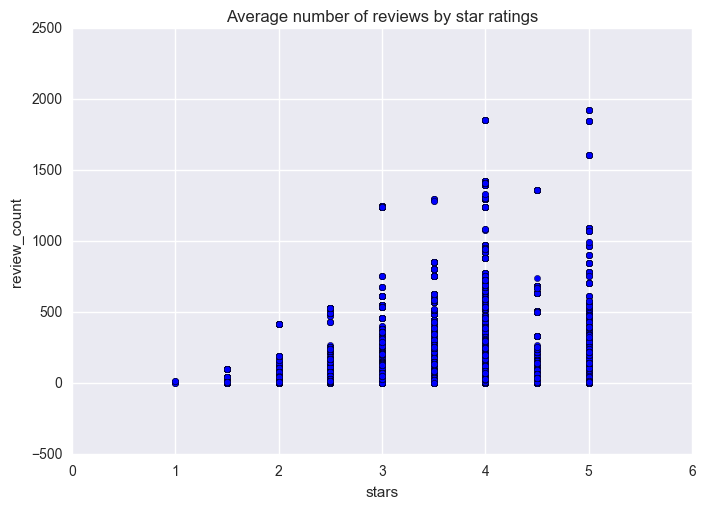

In [6]:
x = data['stars']
y = data['review_count']
plt.ylabel('review_count')
plt.xlabel('stars')
plt.scatter(x,y)
plt.title('Average number of reviews by star ratings')
print('The average number of stars is:', x.mean(), 'reviews:', y.mean())

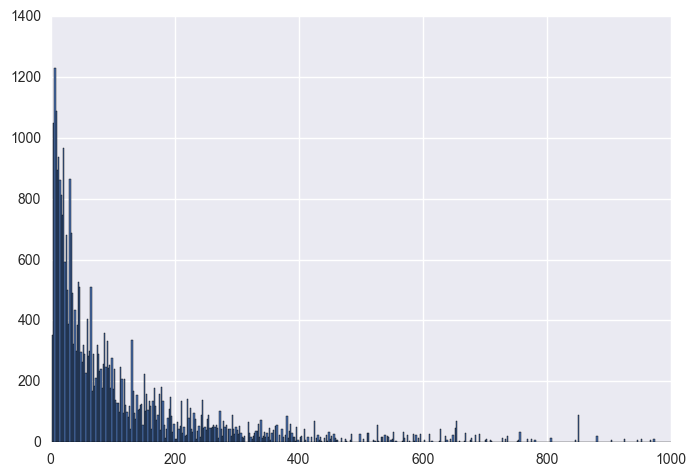

In [7]:
x = data['review_count']
x.xlabel= ('review_count')
x.hist(bins=500, range = [0, 1000])

Mean number of reviews: 121.21422651538967


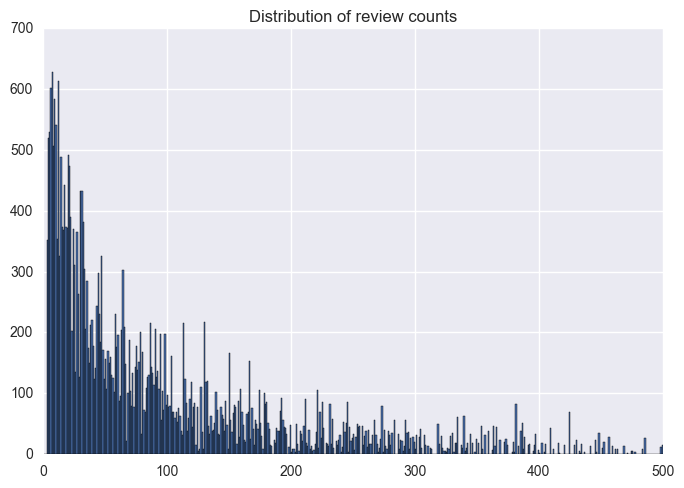

In [8]:
x = data['review_count']
x.xlabel= ('review_count')
x.hist(bins=500, range = [0, 500])
plt.title('Distribution of review counts')
print('Mean number of reviews:', x.mean())


The mean number of violations is: 6.934668914863822 Standard deviation 8.340175123804492


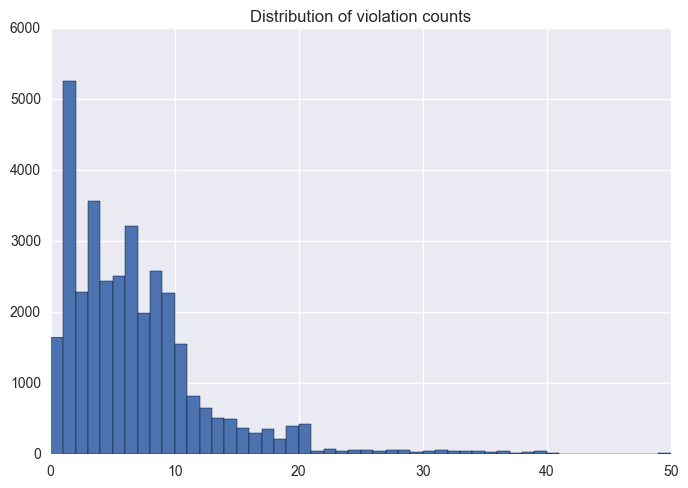

In [9]:
x = data['violations']
plt.xlabel= ('violations')
x.hist(bins=50, range = [0, 50])
plt.title('Distribution of violation counts')
print('The mean number of violations is:', x.mean(), 'Standard deviation', x.std())

(0, 25)

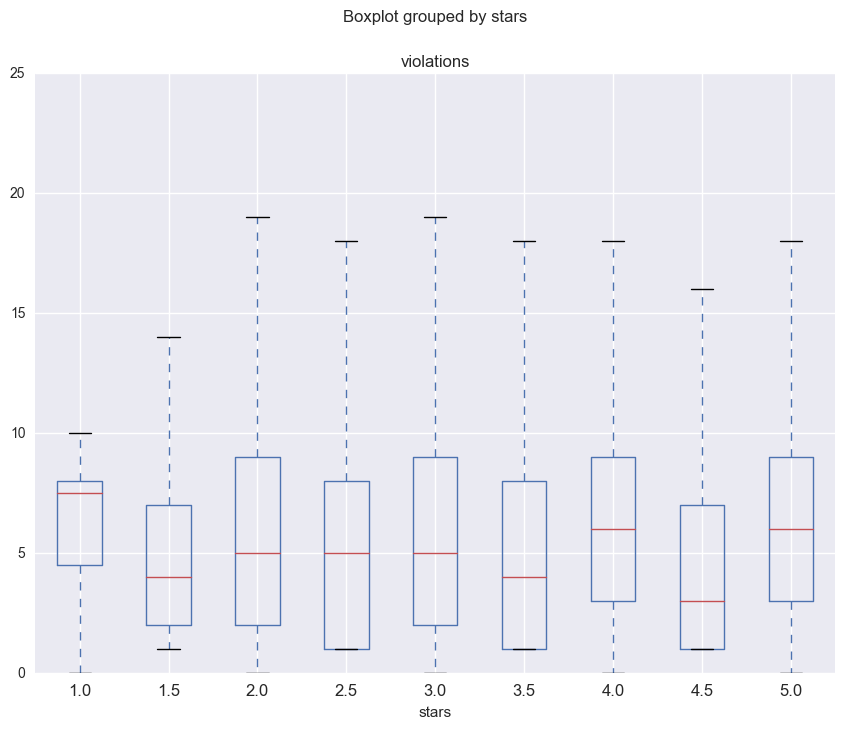

In [10]:
data.boxplot('violations', by='stars', figsize =(10,8))
plt.ylim(0,25)

Number of Las Vegas instances: 10161
Number of Charlotte Instances: 5758
Number of Boston Instances: 19072


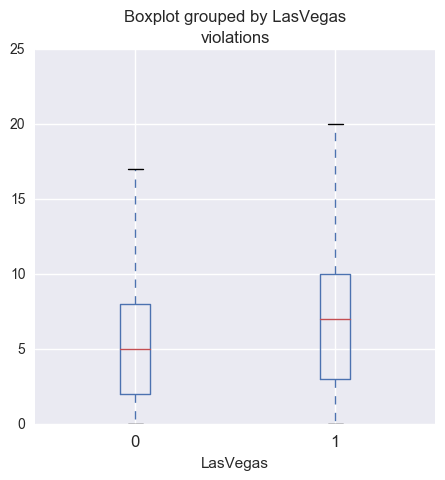

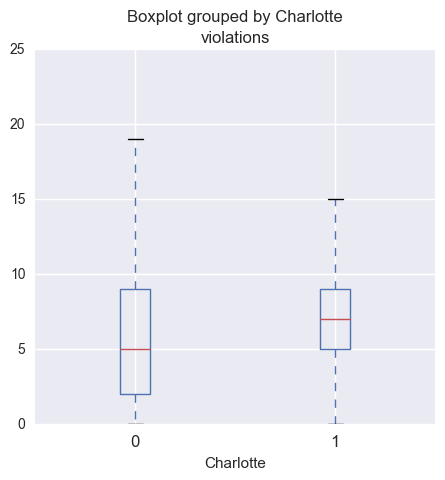

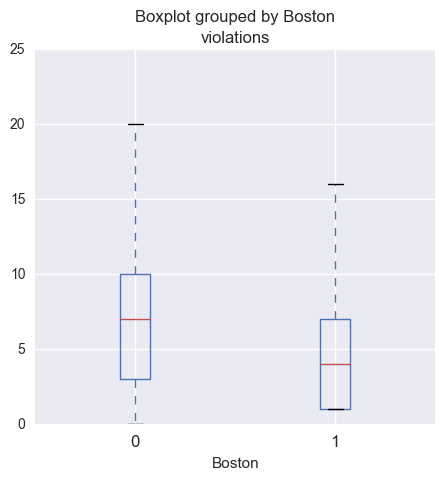

In [11]:
vhist = data.boxplot(['violations'], by ='LasVegas', figsize=(5,5))
vhist.set_ylim(0,25), 
print('Number of Las Vegas instances:', data['LasVegas'].sum())
vhist2 = data.boxplot(['violations'], by = 'Charlotte', figsize=(5,5))
vhist2.set_ylim(0,25)
print('Number of Charlotte Instances:', data['Charlotte'].sum())
vhist3 = data.boxplot(['violations'], by = 'Boston', figsize=(5,5))
vhist3.set_ylim(0,25)
print('Number of Boston Instances:', data['Boston'].sum())

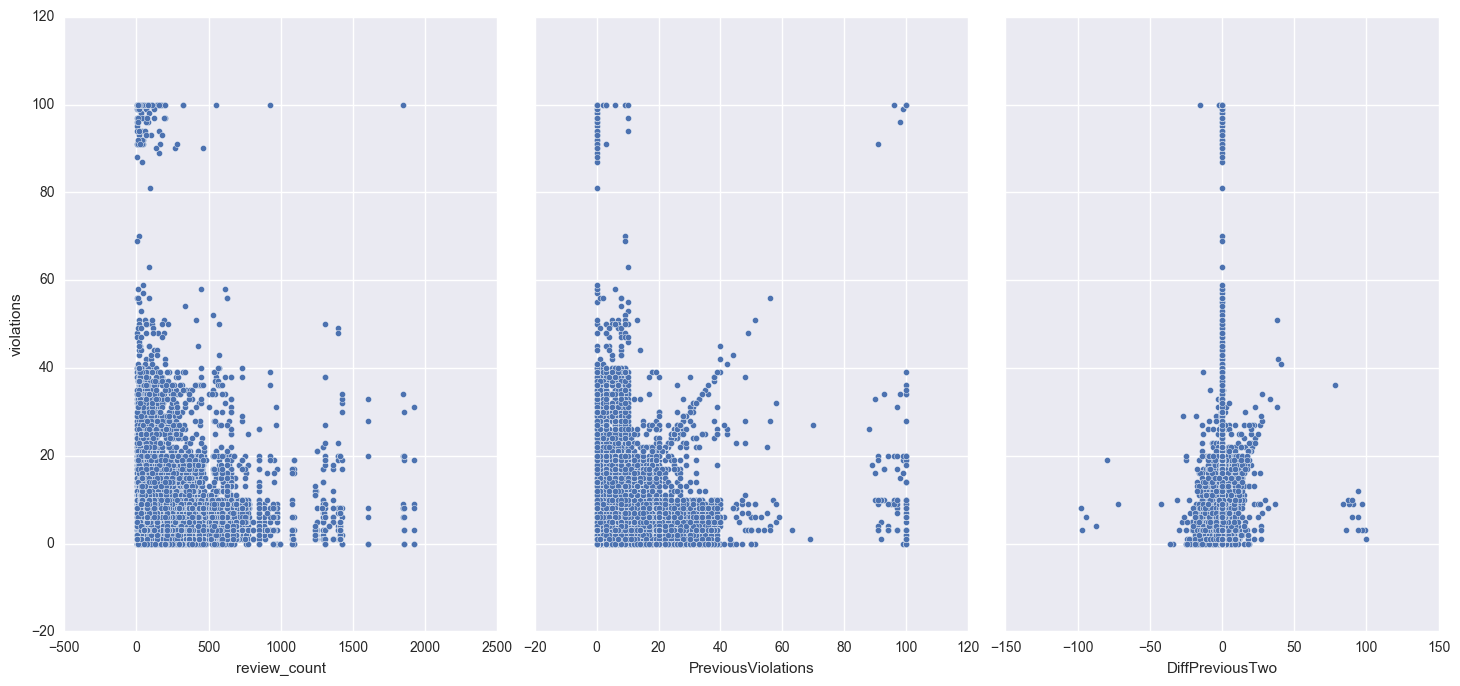

In [12]:
sns.pairplot(data, x_vars=['review_count','PreviousViolations', 'DiffPreviousTwo'], y_vars='violations', size=7, aspect=.7)

In [13]:
#scaling continuous independent variables, with mean zero
sdf = data.copy()
scaled = np.array(sdf[['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo']])
scaled = preprocessing.scale(scaled)
# scaled.shape
final = pd.DataFrame(data = scaled,
                     columns =['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo'])

delist = ['review_count', 'stars', 'pricerange', 'PreviousViolations', 'DiffPreviousTwo']
ndf = data.copy()
for i in delist:
    del ndf[i]
# ndf.shape
df = pd.concat([final, ndf], axis=1)

df.shape

(34991, 68)

In [14]:
variables = df[['PreviousViolations','DiffPreviousTwo','IsAsian','IsFrench','IsSandwiches',
                 'IsFastFood','IsBurgers','IsItalian','IsHawaiian','IsSouthern','IsMexican','IsLatinAmerican','IsMiddleEastern',
                 'IsGreek','IsAmerican','IsDonuts','IsIndian','IsSeafood','IsDesserts','IsSalad','Pizza','IsBuffets',
                 'IsSushiBars','IsDelis','IsSports Bars','IsBakeries','IsPubs','IsCaterers','IsDiners','IsCafes','IsBars',
                 'alcohol','delivery','dogsallowed','smoking','goodforkids','outdoorseating','waiterservice','creditcards',
                 'pricerange','drivethru','tourist','classy','hipster','latenight','upscale','divey','Boston','Charlotte',
                 'LasVegas','neighborhood0','neighborhood1','neighborhood2','neighborhood3','neighborhood4','neighborhood5','neighborhood6']]
target = df['violations']
variables.shape
print(target.shape, variables.shape)

(34991,) (34991, 57)


In [15]:
#Train test splits
splits = cv.train_test_split(variables, target, test_size=0.083)
X_train, X_test, y_train, y_test = splits

Linear Regression model
Mean Squared Error: 67.271
Coefficient of Determination: 0.073


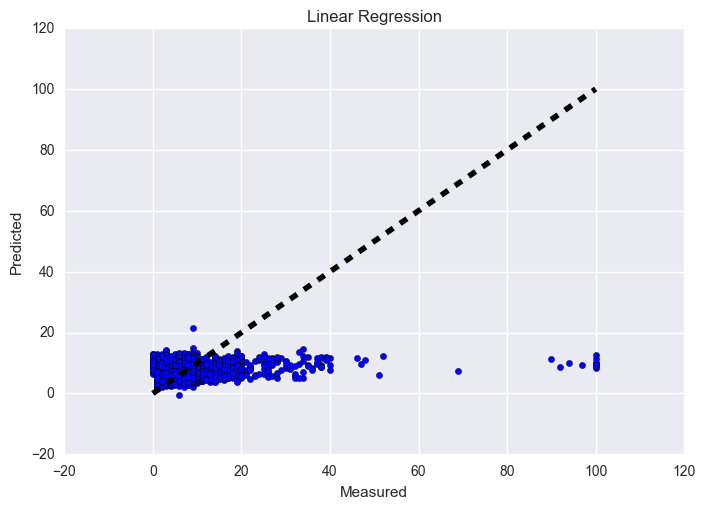

In [16]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))



#Plot measured vs. predicted values
fig, ax = plt.subplots()
ax.scatter(expected, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

In [17]:
labels = np.array(['Variable', 'Coefficient'])
coefs1 = pd.DataFrame(list(zip(variables, model.coef_)), columns = labels)
coefs1

,Variable,Coefficient
0,PreviousViolations,2.653101e-01
1,DiffPreviousTwo,3.804441e-01
2,IsAsian,1.650999e+00
3,IsFrench,4.598483e-01
4,IsSandwiches,-8.024794e-02
5,IsFastFood,-9.591876e-01
6,IsBurgers,-2.078156e-01
7,IsItalian,-4.223281e-02
8,IsHawaiian,8.521552e-01
9,IsSouthern,2.847301e-01


In [18]:
# #Remove outliers that have high violation (> 4 standard deviations)
o = df.copy()
odf = o[((o.violations - o.violations.mean()) / o.violations.std()).abs() < 4]
odf.shape

(34793, 68)

In [19]:
#Select variables and target for cross validation
variables = odf[['PreviousViolations','DiffPreviousTwo','IsAsian','IsFrench','IsSandwiches',
                 'IsFastFood','IsBurgers','IsItalian','IsHawaiian','IsSouthern','IsMexican','IsLatinAmerican','IsMiddleEastern',
                 'IsGreek','IsAmerican','IsDonuts','IsIndian','IsSeafood','IsDesserts','IsSalad','Pizza','IsBuffets',
                 'IsSushiBars','IsDelis','IsSports Bars','IsBakeries','IsPubs','IsCaterers','IsDiners','IsCafes','IsBars',
                 'alcohol','delivery','dogsallowed','smoking','goodforkids','outdoorseating','waiterservice','creditcards',
                 'pricerange','drivethru','tourist','classy','hipster','latenight','upscale','divey','Boston','Charlotte',
                 'LasVegas','neighborhood0','neighborhood1','neighborhood2','neighborhood3','neighborhood4','neighborhood5','neighborhood6']]
target = odf['violations']
print('variables:', variables.shape, 'target:', target.shape)

variables: (34793, 57) target: (34793,)


In [20]:
#Train test splits
splits = cv.train_test_split(variables, target, test_size=0.83)
X_train, X_test, y_train, y_test = splits

Linear Regression model
Mean Squared Error: 32.147
Coefficient of Determination: 0.090


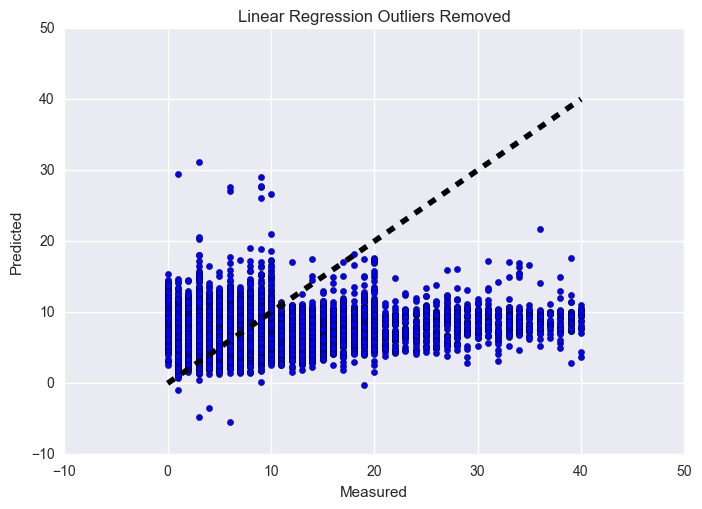

In [21]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))



#Plot measured vs. predicted values
fig, ax = plt.subplots()
ax.scatter(expected, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Linear Regression Outliers Removed')
plt.show()

In [22]:
labels = np.array(['Variable', 'Coefficient'])
coefs2 = pd.DataFrame(list(zip(variables, model.coef_)), columns = labels)
coefs2

,Variable,Coefficient
0,PreviousViolations,6.544443e-01
1,DiffPreviousTwo,5.002954e-01
2,IsAsian,1.804712e+00
3,IsFrench,7.299742e-01
4,IsSandwiches,-3.271383e-02
5,IsFastFood,-3.269316e-01
6,IsBurgers,-7.264680e-01
7,IsItalian,-1.354569e-01
8,IsHawaiian,2.939221e+00
9,IsSouthern,1.607091e+00


Ridge Regression model
Mean Squared Error: 32.145
Coefficient of Determination: 0.090


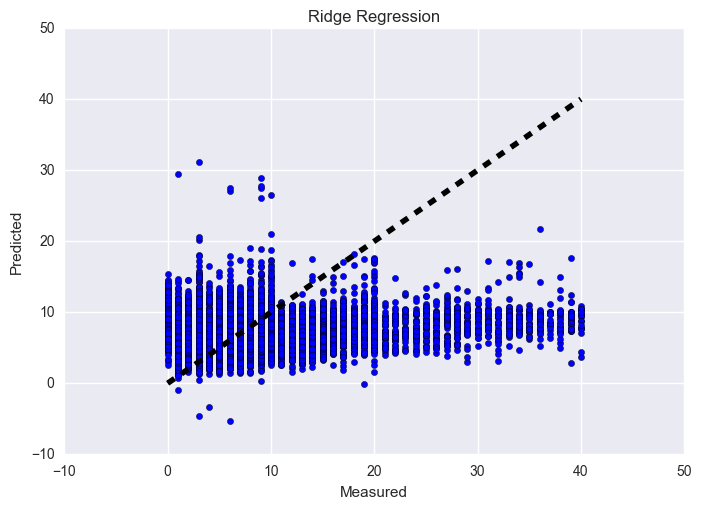

In [23]:
#Ridge Regression
model = Ridge(alpha=.1)
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Ridge Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))



#Plot values
fig, ax = plt.subplots()
ax.scatter(expected, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Ridge Regression')
plt.show()

In [24]:
labels = np.array(['Variable', 'Coefficient'])
coefs3 = pd.DataFrame(list(zip(variables, model.coef_)), columns = labels)
coefs3

,Variable,Coefficient
0,PreviousViolations,0.655159
1,DiffPreviousTwo,0.497795
2,IsAsian,1.800983
3,IsFrench,0.729191
4,IsSandwiches,-0.028212
5,IsFastFood,-0.330862
6,IsBurgers,-0.729437
7,IsItalian,-0.135829
8,IsHawaiian,2.937382
9,IsSouthern,1.603829


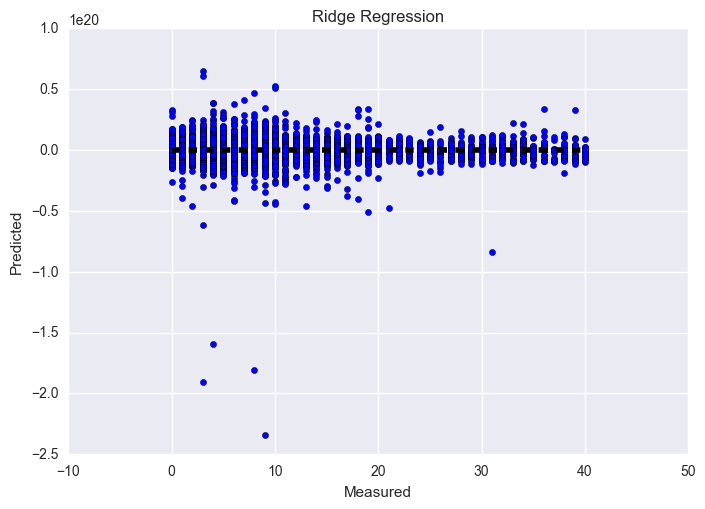

In [25]:
# Investigate alpha level for Ridge Regression Model
n_alphas = 200
alphas = np.logspace(-200, 200, n_alphas)
model = linear_model.RidgeCV(alphas = alphas)
model.fit(X_train, y_train)

expected = y_test
predict = model.predict(X_test)
# print ('Alpha chosen:', model.alpha_, 'Score:', model.score(X_test, y_test))

# cross_val_predict returns an array of the size target with cross validated predictions
predicted = cross_val_predict(model, variables, target, cv=12)

#Plot values
fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Ridge Regression')
plt.show()



In [26]:
#Train test splits
splits = cv.train_test_split(variables, target, test_size=0.083)
X_train, X_test, y_train, y_test = splits

Lasso Regression model
Mean Squared Error: 33.584
Coefficient of Determination: -0.000


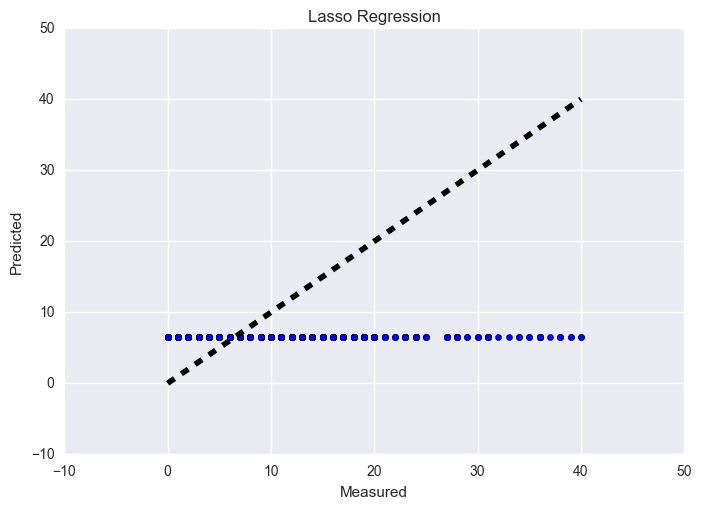

In [27]:
#Lasso Regression
model = Lasso()

model.fit(X_train, y_train)

expected  = y_test
predicted = model.predict(X_test)

# Evaluate fit of the model
print("Lasso Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))


#Plot values
fig, ax = plt.subplots()
ax.scatter(expected, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Lasso Regression')
plt.show()

In [28]:
labels = np.array(['Variable', 'Coefficient'])
coefs4 = pd.DataFrame(list(zip(variables, model.coef_)), columns = labels)
coefs4

,Variable,Coefficient
0,PreviousViolations,0.0
1,DiffPreviousTwo,0.0
2,IsAsian,0.0
3,IsFrench,0.0
4,IsSandwiches,-0.0
5,IsFastFood,-0.0
6,IsBurgers,-0.0
7,IsItalian,-0.0
8,IsHawaiian,0.0
9,IsSouthern,0.0


Random Forest model
Mean squared error = 32.890
R2 score = 0.021


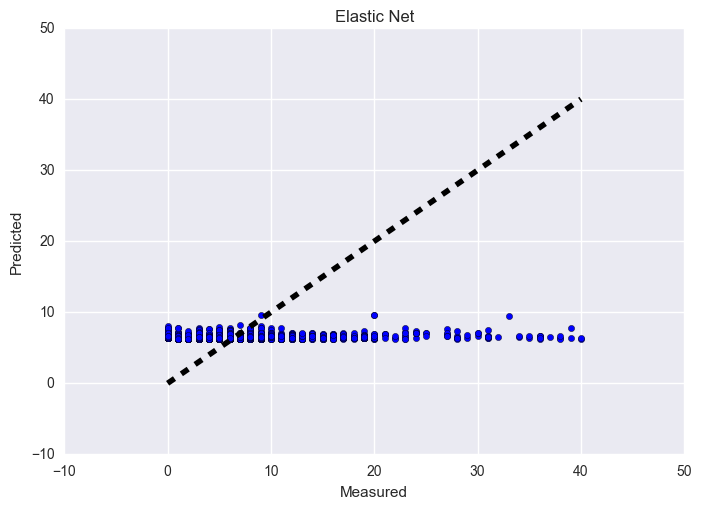

In [29]:
model = ElasticNet()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))



fig, ax = plt.subplots()
ax.scatter(expected, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Elastic Net')
plt.show()

In [30]:
labels = np.array(['Variable', 'Coefficient'])
coefs5 = pd.DataFrame(list(zip(variables, model.coef_)), columns = labels)
coefs5

,Variable,Coefficient
0,PreviousViolations,0.279822
1,DiffPreviousTwo,0.000000
2,IsAsian,0.000000
3,IsFrench,0.000000
4,IsSandwiches,-0.000000
5,IsFastFood,-0.000000
6,IsBurgers,-0.000000
7,IsItalian,-0.000000
8,IsHawaiian,0.000000
9,IsSouthern,0.000000


Random Forest model
Mean squared error = 33.305
R2 score = 0.008


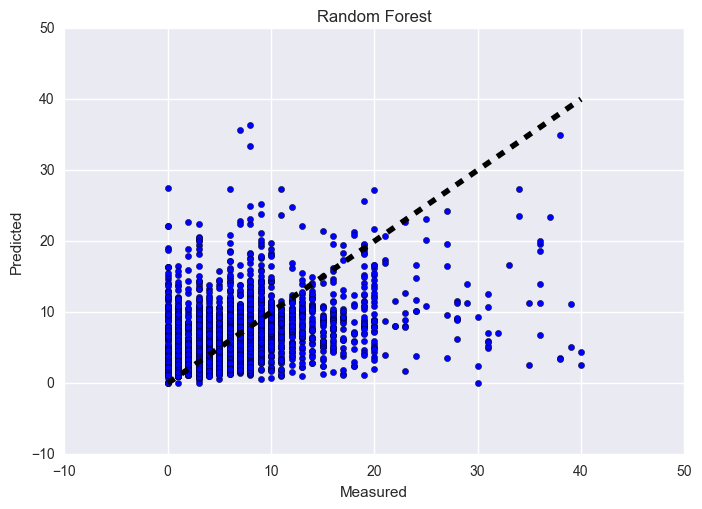

In [31]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

expected = y_test
predicted = model.predict(X_test)

print("Random Forest model")
print("Mean squared error = %0.3f" % mse(expected, predicted))
print("R2 score = %0.3f" % r2_score(expected, predicted))



fig, ax = plt.subplots()
ax.scatter(expected, predicted)
ax.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Random Forest')
plt.show()

Linear Regression model
Mean Squared Error: 28.793
Coefficient of Determination: 0.143


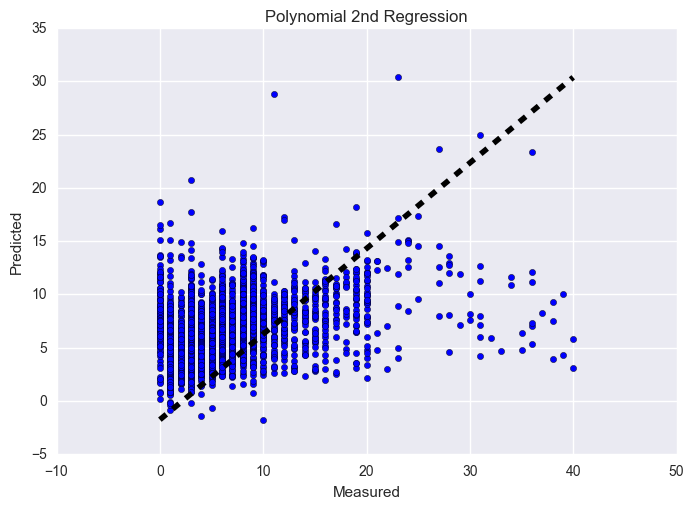

In [ ]:
polypipe = Pipeline([('Polynomial', PolynomialFeatures(2)),
                     ('LinearRegression', LinearRegression())])
        
polypipe.fit(X_train, y_train)

expected = y_test
predicted = polypipe.predict(X_test)

print("Linear Regression model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))


fig, ax = plt.subplots()
ax.scatter(expected, predicted)
ax.plot([target.min(), target.max()], [predicted.min(), predicted.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title ('Polynomial 2nd Regression')
plt.show()

In [ ]:
# polypipe = Pipeline([('Polynomial', PolynomialFeatures(3)),
#                      ('LinearRegression', LinearRegression())])
        
# polypipe.fit(X_train, y_train)

# expected = y_test
# predicted = polypipe.predict(X_test)

# print("Linear Regression model")
# print("Mean Squared Error: %0.3f" % mse(expected, predicted))
# print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))


# fig, ax = plt.subplots()
# ax.scatter(expected, predicted)
# ax.plot([target.min(), target.max()], [predicted.min(), predicted.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.title ('Polynomial 2nd Regression')
# plt.show()

In [ ]:
labels = np.array(['Variable', 'Coefficient'])
coefs6 = pd.DataFrame(list(zip(variables, polypipe.named_steps['LinearRegression'].coef_)), columns = labels)
coefs6

In [ ]:
featurepipe = Pipeline([('Dimension Reduction', PCA()),
                        ('Random Forest', RandomForestRegressor())])
            
featurepipe.fit(X_train, y_train)

expected = y_test
predicted = featurepipe.predict(X_test)

print("Random Forest model")
print("Mean Squared Error: %0.3f" % mse(expected, predicted))
print("Coefficient of Determination: %0.3f" % r2_score(expected, predicted))

#Plot values
fig, ax = plt.subplots()
ax.scatter(target, predicted)
ax.plot([target.min(), target.max()], [predicted.min(), predicted.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.title('Random Forest PCA')
plt.show()